In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [100]:
pd.set_option("display.max_columns",None)

### Data

In [276]:
data = pd.read_csv('telecomdata_onehot.csv',index_col=0)

In [102]:
data.head()

,CustomerID,City,ZipCode,Gender,SeniorCitizen,Dependents,TenureMonths,MonthlyCharges,TotalCharges,ChurnValue,ChurnScore,CLTV,ChurnReason,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,ChurnReasonCategory,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4
0,3668-QPYBK,562,90003,1,0,0,2,53.85,108.15,1,86,3239,Competitor made better offer,37,0,0,0,0,0,2,10.47,21,0,0,0,1,53.85,0.0,0,20.94,129.09,1,price,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,9237-HQITU,562,90005,0,0,1,2,70.70,151.65,1,67,2701,Moved,19,1,0,2,0,0,2,9.12,51,0,0,0,1,70.70,0.0,0,18.24,169.89,2,others,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9305-CDSKC,562,90006,0,0,1,8,99.65,820.5,1,86,5372,Moved,31,0,0,2,0,0,8,12.15,26,1,0,1,1,99.65,0.0,0,97.20,917.70,3,others,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7892-POOKP,562,90010,0,0,1,28,104.80,3046.05,1,84,5003,Moved,23,1,1,3,0,0,28,4.89,47,1,1,1,1,104.80,0.0,0,136.92,3182.97,3,others,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0280-XJGEX,562,90015,1,0,1,49,103.70,5036.3,1,89,5340,Competitor had better devices,38,0,0,1,0,0,49,44.33,11,1,0,1,1,103.70,0.0,0,2172.17,7208.47,1,service,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 78 columns):
CustomerID                       7043 non-null object
City                             7043 non-null int64
ZipCode                          7043 non-null int64
Gender                           7043 non-null int64
SeniorCitizen                    7043 non-null int64
Dependents                       7043 non-null int64
TenureMonths                     7043 non-null int64
MonthlyCharges                   7043 non-null float64
TotalCharges                     7043 non-null object
ChurnValue                       7043 non-null int64
ChurnScore                       7043 non-null int64
CLTV                             7043 non-null int64
ChurnReason                      1869 non-null object
Age                              7043 non-null int64
Under30                          7043 non-null int64
Married                          7043 non-null int64
NumberofDependents               7043 no

### Churn Users

In [173]:
data_churn = data.loc[data['ChurnValue'] == 1]
data_churn.drop(columns=['ZipCode','City','TenureMonths','TenureinMonths','ChurnValue','CustomerID','ChurnReasonCategory', 'ChurnScore','ChurnReason'],inplace = True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [174]:
data_churn.head()

,Gender,SeniorCitizen,Dependents,MonthlyCharges,TotalCharges,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4
0,1,0,0,53.85,108.15,3239,37,0,0,0,0,0,10.47,21,0,0,0,1,53.85,0.0,0,20.94,129.09,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,1,70.70,151.65,2701,19,1,0,2,0,0,9.12,51,0,0,0,1,70.70,0.0,0,18.24,169.89,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,99.65,820.5,5372,31,0,0,2,0,0,12.15,26,1,0,1,1,99.65,0.0,0,97.20,917.70,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,1,104.80,3046.05,5003,23,1,1,3,0,0,4.89,47,1,1,1,1,104.80,0.0,0,136.92,3182.97,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,1,103.70,5036.3,5340,38,0,0,1,0,0,44.33,11,1,0,1,1,103.70,0.0,0,2172.17,7208.47,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [175]:
data_churn_norm = data_churn.copy()
cols_to_norm = ['MonthlyCharges', 'TotalCharges', 'CLTV', 'Age', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'MonthlyCharge', 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue']
data_churn_norm[cols_to_norm] = StandardScaler().fit_transform(data_churn_norm[cols_to_norm])

In [176]:
data_churn_norm.head()

,Gender,SeniorCitizen,Dependents,MonthlyCharges,TotalCharges,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4
0,1,0,0,-0.835028,-0.753126,-0.765664,-0.723611,0,0,0,0,0,-0.824236,-0.064220,0,0,0,1,-0.835028,-0.215772,-0.288077,-0.635170,-0.755711,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,1,-0.151720,-0.730114,-1.218125,-1.746328,1,0,2,0,0,-0.911868,1.574746,0,0,0,1,-0.151720,-0.215772,-0.288077,-0.639323,-0.738974,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,1.022272,-0.376284,1.028201,-1.064517,0,0,2,0,0,-0.715183,0.208941,1,0,1,1,1.022272,-0.215772,-0.288077,-0.517880,-0.432217,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,1,1.231117,0.801058,0.717870,-1.519057,1,1,3,0,0,-1.186448,1.356217,1,1,1,1,1.231117,-0.215772,-0.288077,-0.456790,0.497014,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,1,1.186509,1.853924,1.001289,-0.666794,0,0,1,0,0,1.373703,-0.610542,1,0,1,1,1.186509,-0.215772,-0.288077,2.673477,2.148306,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [177]:
#data_churn_norm.columns=data_churn.columns

In [223]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_churn_norm)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

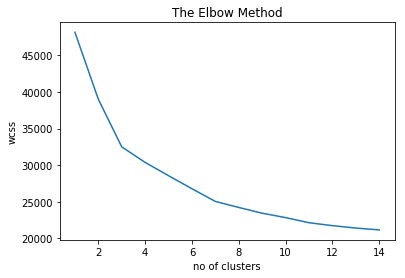

In [224]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [225]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42)
y_kmeans= kmeansmodel.fit_predict(data_churn_norm)

In [226]:
y_kmeans.shape

(1869,)

In [227]:
data_churn_norm['label'] = y_kmeans

In [228]:
import copy

data_churn_final = copy.deepcopy(data_churn)
data_churn_final['label'] = data_churn_norm['label']

In [229]:
data_churn_final.head()

,Gender,SeniorCitizen,Dependents,MonthlyCharges,TotalCharges,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4,label
0,1,0,0,53.85,108.15,3239,37,0,0,0,0,0,10.47,21,0,0,0,1,53.85,0.0,0,20.94,129.09,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
1,0,0,1,70.70,151.65,2701,19,1,0,2,0,0,9.12,51,0,0,0,1,70.70,0.0,0,18.24,169.89,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2,0,0,1,99.65,820.5,5372,31,0,0,2,0,0,12.15,26,1,0,1,1,99.65,0.0,0,97.20,917.70,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
3,0,0,1,104.80,3046.05,5003,23,1,1,3,0,0,4.89,47,1,1,1,1,104.80,0.0,0,136.92,3182.97,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,1,0,1,103.70,5036.3,5340,38,0,0,1,0,0,44.33,11,1,0,1,1,103.70,0.0,0,2172.17,7208.47,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [230]:
#export
data_churn_final.to_csv('data_churn_final_2.csv',index=True)

In [254]:
#data_churn_final with ChurnReasonCategory
data_churn_final_1 = data_churn_final.copy

In [255]:
data_churn_1 = data.loc[data['ChurnValue'] == 1]

In [258]:
data_churn_final_1['ChurnReasonCategory'] =  data_churn_1['ChurnReasonCategory']

In [260]:
data_churn_final_1.to_csv('data_churn_final_2_with_churnreason.csv',index=True)

In [206]:
#data_churn_final.loc[data_churn_final.label == 0, 'TotalCharges'] #TotalCharges SatisfactionScore

In [207]:
data_churn_final.columns

Index(['Gender', 'SeniorCitizen', 'Dependents', 'MonthlyCharges',
       'TotalCharges', 'CLTV', 'Age', 'Under30', 'Married',
       'NumberofDependents', 'ReferredaFriend', 'NumberofReferrals',
       'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload',
       'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingMusic',
       'UnlimitedData', 'MonthlyCharge', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'PhoneService_1', 'PhoneService_2',
       'MultipleLines_1', 'MultipleLines_2', 'MultipleLines_3',
       'InternetService_1', 'InternetService_2', 'InternetService_3',
       'OnlineSecurity_1', 'OnlineSecurity_2', 'OnlineSecurity_3',
       'OnlineBackup_1', 'OnlineBackup_2', 'OnlineBackup_3',
       'DeviceProtection_1', 'DeviceProtection_2', 'DeviceProtection_3',
       'TechSupport_1', 'TechSupport_2', 'TechSupport_3', 'StreamingTV_1',
       'StreamingTV_2', 'StreamingTV_3', 'StreamingMovies_1',
 

In [ ]:
data_churn_final

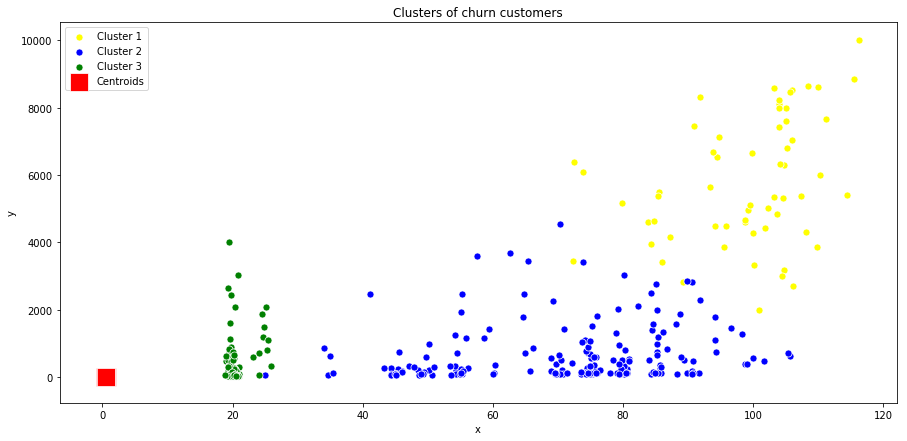

In [196]:
# Visualising the clusters
plt.figure(figsize=(15,7))

x = 'MonthlyCharges'
y = 'TotalRevenue'

sns.scatterplot(data_churn_final.loc[data_churn_final.label == 0, x], data_churn_final.loc[data_churn_final.label == 0, y], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(data_churn_final.loc[data_churn_final.label == 1, x], data_churn_final.loc[data_churn_final.label == 1, y], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(data_churn_final.loc[data_churn_final.label == 2, x], data_churn_final.loc[data_churn_final.label == 2, y], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(data_churn_norm[y_kmeans == 3, 0], data_churn[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of churn customers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [232]:
data_churn_tsne = data_churn_norm.drop(columns=['label'])
tsne = sklearn.manifold.TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(data_churn_norm)
tsne_results = tsne.fit_transform(data_churn_tsne)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1869 samples in 0.033s...
[t-SNE] Computed neighbors for 1869 samples in 4.996s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1869
[t-SNE] Computed conditional probabilities for sample 1869 / 1869
[t-SNE] Mean sigma: 1.457162
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.473572
[t-SNE] KL divergence after 300 iterations: 1.696024


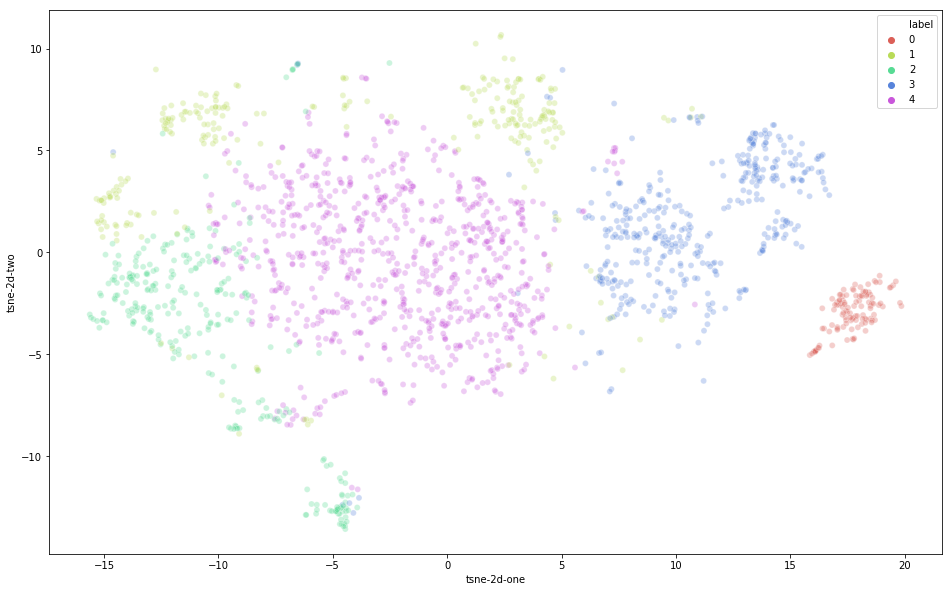

In [234]:
import copy

data_churn_tsne_plot = copy.deepcopy(data_churn_tsne)
data_churn_tsne_plot['label'] = data_churn_norm['label']

data_churn_tsne_plot['tsne-2d-one'] = tsne_results[:,0]
data_churn_tsne_plot['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 5),
    data=data_churn_tsne_plot,
    legend="full",
    alpha=0.3
)

In [333]:
data_churn_final.groupby(['OnlineSecurity_1']).size()

OnlineSecurity_1
0.0     408
1.0    1461
dtype: int64

In [334]:
data_churn_final.groupby(['OnlineSecurity_2']).size()

OnlineSecurity_2
0.0    1756
1.0     113
dtype: int64

### Non-Churn Users

In [211]:
data_nochurn = data.loc[data['ChurnValue'] == 0]
data_nochurn['TotalCharges'] = pd.to_numeric(data_nochurn['TotalCharges'],errors='coerce')
data_nochurn['TotalCharges'].fillna(value=0, inplace=True)
data_nochurn.drop(columns=['ZipCode','City','TenureMonths','TenureinMonths','ChurnValue','CustomerID','ChurnReasonCategory', 'ChurnScore','ChurnReason'],inplace = True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [212]:
data_nochurn.head()

,Gender,SeniorCitizen,Dependents,MonthlyCharges,TotalCharges,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4
1869,0,0,0,29.85,29.85,3964,36,0,1,0,0,0,0.00,10,0,0,0,1,29.85,0.0,0,0.00,29.85,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1870,1,0,0,56.95,1889.50,3441,46,0,0,0,0,0,17.09,16,1,0,0,1,56.95,0.0,0,581.06,2470.56,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1871,1,0,0,42.30,1840.75,4307,53,0,0,0,0,0,0.00,10,1,1,0,1,42.30,0.0,0,0.00,1840.75,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1872,1,0,1,89.10,1949.40,4459,42,0,0,3,0,0,29.54,53,0,0,0,1,89.10,0.0,0,649.88,2599.28,4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1873,0,0,0,29.75,301.90,2013,42,0,0,0,0,0,0.00,8,0,0,0,1,29.75,0.0,0,0.00,301.90,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [213]:
data_nochurn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 1869 to 7042
Data columns (total 69 columns):
Gender                           5174 non-null int64
SeniorCitizen                    5174 non-null int64
Dependents                       5174 non-null int64
MonthlyCharges                   5174 non-null float64
TotalCharges                     5174 non-null float64
CLTV                             5174 non-null int64
Age                              5174 non-null int64
Under30                          5174 non-null int64
Married                          5174 non-null int64
NumberofDependents               5174 non-null int64
ReferredaFriend                  5174 non-null int64
NumberofReferrals                5174 non-null int64
AvgMonthlyLongDistanceCharges    5174 non-null float64
AvgMonthlyGBDownload             5174 non-null int64
DeviceProtectionPlan             5174 non-null int64
PremiumTechSupport               5174 non-null int64
StreamingMusic                   517

In [215]:
data_nochurn_norm = data_nochurn.copy()
cols_to_norm = ['MonthlyCharges', 'TotalCharges', 'CLTV', 'Age', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'MonthlyCharge', 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue']
data_nochurn_norm[cols_to_norm] = StandardScaler().fit_transform(data_nochurn_norm[cols_to_norm])
#data_nochurn_norm = pd.DataFrame(sklearn.preprocessing.normalize(data_nochurn))

In [216]:
#data_nochurn_norm.columns=data_nochurn.columns

In [217]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_nochurn_norm)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

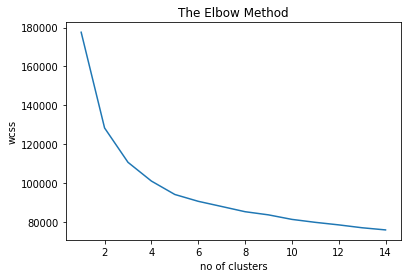

In [218]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [235]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42)
y_kmeans_nochurn= kmeansmodel.fit_predict(data_nochurn_norm)

In [236]:
y_kmeans_nochurn.shape

(5174,)

In [237]:
data_nochurn_norm['label'] = y_kmeans_nochurn

In [238]:
import copy

data_nochurn_final = copy.deepcopy(data_nochurn)
data_nochurn_final['label'] = data_nochurn_norm['label']

In [239]:
data_nochurn_final.head()

,Gender,SeniorCitizen,Dependents,MonthlyCharges,TotalCharges,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4,label
1869,0,0,0,29.85,29.85,3964,36,0,1,0,0,0,0.00,10,0,0,0,1,29.85,0.0,0,0.00,29.85,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1870,1,0,0,56.95,1889.50,3441,46,0,0,0,0,0,17.09,16,1,0,0,1,56.95,0.0,0,581.06,2470.56,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1871,1,0,0,42.30,1840.75,4307,53,0,0,0,0,0,0.00,10,1,1,0,1,42.30,0.0,0,0.00,1840.75,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1872,1,0,1,89.10,1949.40,4459,42,0,0,3,0,0,29.54,53,0,0,0,1,89.10,0.0,0,649.88,2599.28,4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1873,0,0,0,29.75,301.90,2013,42,0,0,0,0,0,0.00,8,0,0,0,1,29.75,0.0,0,0.00,301.90,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [240]:
#export
data_nochurn_final.to_csv('data_nochurn_final_2.csv',index=True)

In [241]:
data_nochurn_final.columns

Index(['Gender', 'SeniorCitizen', 'Dependents', 'MonthlyCharges',
       'TotalCharges', 'CLTV', 'Age', 'Under30', 'Married',
       'NumberofDependents', 'ReferredaFriend', 'NumberofReferrals',
       'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload',
       'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingMusic',
       'UnlimitedData', 'MonthlyCharge', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'PhoneService_1', 'PhoneService_2',
       'MultipleLines_1', 'MultipleLines_2', 'MultipleLines_3',
       'InternetService_1', 'InternetService_2', 'InternetService_3',
       'OnlineSecurity_1', 'OnlineSecurity_2', 'OnlineSecurity_3',
       'OnlineBackup_1', 'OnlineBackup_2', 'OnlineBackup_3',
       'DeviceProtection_1', 'DeviceProtection_2', 'DeviceProtection_3',
       'TechSupport_1', 'TechSupport_2', 'TechSupport_3', 'StreamingTV_1',
       'StreamingTV_2', 'StreamingTV_3', 'StreamingMovies_1',
 

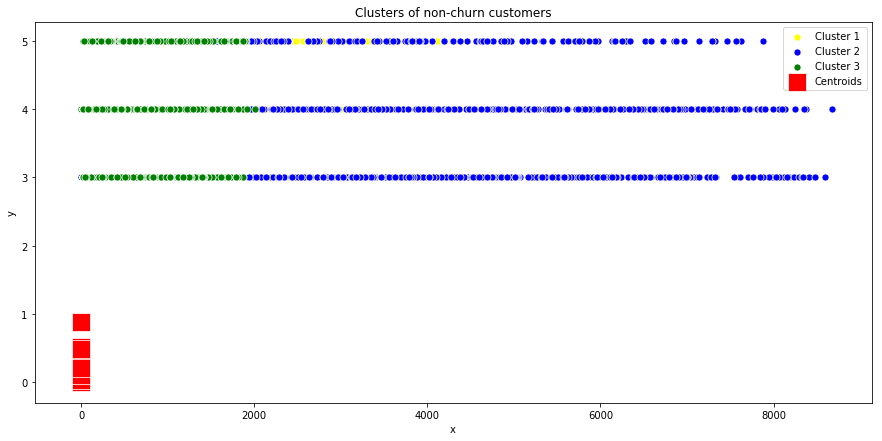

In [242]:
# Visualising the clusters
plt.figure(figsize=(15,7))

x = 'TotalCharges'
y = 'SatisfactionScore'

sns.scatterplot(data_nochurn_final.loc[data_nochurn_final.label == 0, x], data_nochurn_final.loc[data_nochurn_final.label == 0, y], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(data_nochurn_final.loc[data_nochurn_final.label == 1, x], data_nochurn_final.loc[data_nochurn_final.label == 1, y], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(data_nochurn_final.loc[data_nochurn_final.label == 2, x], data_nochurn_final.loc[data_nochurn_final.label == 2, y], color = 'green', label = 'Cluster 3',s=50)
#sns.scatterplot(data_churn_norm[y_kmeans == 3, 0], data_churn[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of non-churn customers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [243]:
data_nochurn_tsne = data_nochurn_norm.drop(columns=['label'])
tsne = sklearn.manifold.TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(data_nochurn_norm)
tsne_results = tsne.fit_transform(data_nochurn_tsne)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5174 samples in 0.110s...
[t-SNE] Computed neighbors for 5174 samples in 26.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5174
[t-SNE] Computed conditional probabilities for sample 2000 / 5174
[t-SNE] Computed conditional probabilities for sample 3000 / 5174
[t-SNE] Computed conditional probabilities for sample 4000 / 5174
[t-SNE] Computed conditional probabilities for sample 5000 / 5174
[t-SNE] Computed conditional probabilities for sample 5174 / 5174
[t-SNE] Mean sigma: 1.470291
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.420982
[t-SNE] KL divergence after 300 iterations: 2.316967


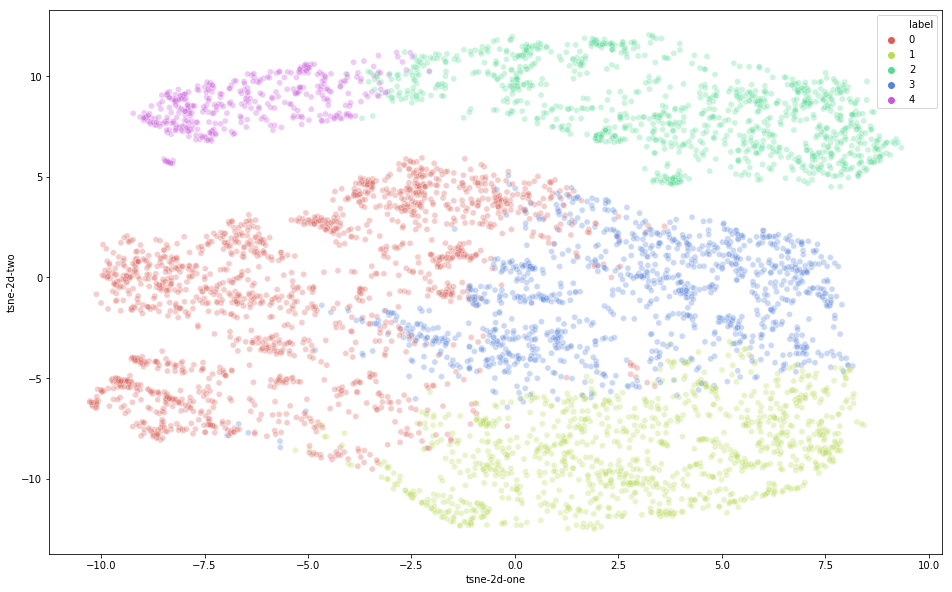

In [244]:
import copy

data_nochurn_tsne_plot = copy.deepcopy(data_nochurn_tsne)
data_nochurn_tsne_plot['label'] = data_nochurn_norm['label']

data_nochurn_tsne_plot['tsne-2d-one'] = tsne_results[:,0]
data_nochurn_tsne_plot['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 5),
    data=data_nochurn_tsne_plot,
    legend="full",
    alpha=0.3
)

In [245]:
#rename 123 to 456
def set_label(row):
    if row["label"] == 1:
        return 6
    elif row["label"] == 2:
        return 7
    elif row["label"] == 3:
        return 8
    elif row["label"] == 4:
        return 9
    else:
        return 10

data_nochurn_final_2 = data_nochurn_final.assign(label=data_nochurn_final.apply(set_label, axis=1))

#print(data_nochurn_norm)
#data_nochurn_norm.drop(columns=['label'])
#data_nochurn_norm = data_nochurn_norm.rename({'label2': 'label'}, axis=1)

In [246]:
data_nochurn_final_2.head()

,Gender,SeniorCitizen,Dependents,MonthlyCharges,TotalCharges,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4,label
1869,0,0,0,29.85,29.85,3964,36,0,1,0,0,0,0.00,10,0,0,0,1,29.85,0.0,0,0.00,29.85,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,10
1870,1,0,0,56.95,1889.50,3441,46,0,0,0,0,0,17.09,16,1,0,0,1,56.95,0.0,0,581.06,2470.56,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10
1871,1,0,0,42.30,1840.75,4307,53,0,0,0,0,0,0.00,10,1,1,0,1,42.30,0.0,0,0.00,1840.75,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10
1872,1,0,1,89.10,1949.40,4459,42,0,0,3,0,0,29.54,53,0,0,0,1,89.10,0.0,0,649.88,2599.28,4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10
1873,0,0,0,29.75,301.90,2013,42,0,0,0,0,0,0.00,8,0,0,0,1,29.75,0.0,0,0.00,301.90,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10


In [247]:
# append 
data_final = data_churn_final.append(data_nochurn_final_2)

In [248]:
data_final.shape

(7043, 70)

In [249]:
#export
data_final.to_csv('data_final_2.csv',index=True)

In [261]:
data_final.columndris

Index(['Gender', 'SeniorCitizen', 'Dependents', 'MonthlyCharges',
       'TotalCharges', 'CLTV', 'Age', 'Under30', 'Married',
       'NumberofDependents', 'ReferredaFriend', 'NumberofReferrals',
       'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload',
       'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingMusic',
       'UnlimitedData', 'MonthlyCharge', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'PhoneService_1', 'PhoneService_2',
       'MultipleLines_1', 'MultipleLines_2', 'MultipleLines_3',
       'InternetService_1', 'InternetService_2', 'InternetService_3',
       'OnlineSecurity_1', 'OnlineSecurity_2', 'OnlineSecurity_3',
       'OnlineBackup_1', 'OnlineBackup_2', 'OnlineBackup_3',
       'DeviceProtection_1', 'DeviceProtection_2', 'DeviceProtection_3',
       'TechSupport_1', 'TechSupport_2', 'TechSupport_3', 'StreamingTV_1',
       'StreamingTV_2', 'StreamingTV_3', 'StreamingMovies_1',
 

In [266]:
data_final_without_satis = data_final.drop(columns=['SatisfactionScore'])

In [267]:
data_final_without_satis

,Gender,SeniorCitizen,Dependents,MonthlyCharges,TotalCharges,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4,label
0,1,0,0,53.85,108.15,3239,37,0,0,0,0,0,10.47,21,0,0,0,1,53.85,0.00,0,20.94,129.09,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
1,0,0,1,70.70,151.65,2701,19,1,0,2,0,0,9.12,51,0,0,0,1,70.70,0.00,0,18.24,169.89,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2,0,0,1,99.65,820.5,5372,31,0,0,2,0,0,12.15,26,1,0,1,1,99.65,0.00,0,97.20,917.70,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
3,0,0,1,104.80,3046.05,5003,23,1,1,3,0,0,4.89,47,1,1,1,1,104.80,0.00,0,136.92,3182.97,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,1,0,1,103.70,5036.3,5340,38,0,0,1,0,0,44.33,11,1,0,1,1,103.70,0.00,0,2172.17,7208.47,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
5,0,0,0,55.20,528.35,5925,21,1,1,0,1,6,9.41,69,1,1,0,1,55.20,0.00,0,94.10,622.45,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
6,1,1,0,39.65,39.65,5433,78,0,0,0,0,0,0.00,8,1,0,0,0,39.65,0.00,20,0.00,59.65,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
7,1,0,0,20.15,20.15,4832,29,1,0,0,0,0,33.58,0,0,0,0,0,20.15,0.00,0,33.58,53.73,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
8,1,0,1,99.35,4749.15,5789,61,0,1,1,1,1,31.35,16,0,0,1,1,99.35,0.00,0,1473.45,6222.60,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
9,1,0,0,30.20,30.2,2915,27,1,1,0,1,1,0.00,58,0,0,0,1,30.20,0.00,0,0.00,30.20,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3


In [268]:
data_final_without_satis.columns

Index(['Gender', 'SeniorCitizen', 'Dependents', 'MonthlyCharges',
       'TotalCharges', 'CLTV', 'Age', 'Under30', 'Married',
       'NumberofDependents', 'ReferredaFriend', 'NumberofReferrals',
       'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload',
       'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingMusic',
       'UnlimitedData', 'MonthlyCharge', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'PhoneService_1', 'PhoneService_2', 'MultipleLines_1',
       'MultipleLines_2', 'MultipleLines_3', 'InternetService_1',
       'InternetService_2', 'InternetService_3', 'OnlineSecurity_1',
       'OnlineSecurity_2', 'OnlineSecurity_3', 'OnlineBackup_1',
       'OnlineBackup_2', 'OnlineBackup_3', 'DeviceProtection_1',
       'DeviceProtection_2', 'DeviceProtection_3', 'TechSupport_1',
       'TechSupport_2', 'TechSupport_3', 'StreamingTV_1', 'StreamingTV_2',
       'StreamingTV_3', 'StreamingMovies_1', 'StreamingMovies_2',
 

In [269]:
#export
data_final_without_satis.to_csv('data_final_without_satis.csv',index=True)

### churn reason cluster

In [270]:
churn_reason = pd.read_csv('data_churn_final_2_with_churnreason.csv',index_col=0)

In [271]:
churn_reason.head()

,Gender,SeniorCitizen,Dependents,MonthlyCharges,TotalCharges,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4,label,ChurnReasonCategory
0,1,0,0,53.85,108.15,3239,37,0,0,0,0,0,10.47,21,0,0,0,1,53.85,0.0,0,20.94,129.09,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,price
1,0,0,1,70.70,151.65,2701,19,1,0,2,0,0,9.12,51,0,0,0,1,70.70,0.0,0,18.24,169.89,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,others
2,0,0,1,99.65,820.50,5372,31,0,0,2,0,0,12.15,26,1,0,1,1,99.65,0.0,0,97.20,917.70,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,others
3,0,0,1,104.80,3046.05,5003,23,1,1,3,0,0,4.89,47,1,1,1,1,104.80,0.0,0,136.92,3182.97,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,others
4,1,0,1,103.70,5036.30,5340,38,0,0,1,0,0,44.33,11,1,0,1,1,103.70,0.0,0,2172.17,7208.47,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,service


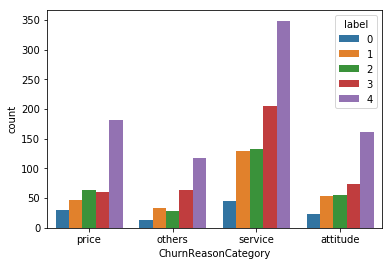

In [272]:
ax = sns.countplot(x="ChurnReasonCategory", data=churn_reason, hue = "label")

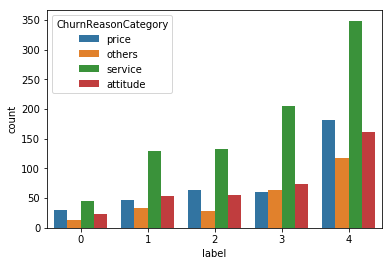

In [282]:
ax = sns.countplot(x="label", data=churn_reason, hue = "ChurnReasonCategory")


In [319]:
churn_reason_0 = churn_reason.loc[data['label'] == 0]

In [321]:
churn_reason_0_plot = churn_reason_0.groupby(['ChurnReasonCategory']).agg('count').apply(lambda x: x/float(x.sum()))#['Gender','ChurnReasonCategory']


In [322]:
churn_reason_0_plot

,Gender,SeniorCitizen,Dependents,MonthlyCharges,TotalCharges,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4,label
ChurnReasonCategory,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
attitude,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389,0.212389
others,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044
price,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487,0.265487
service,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080,0.407080


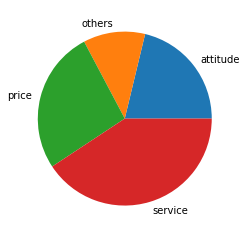

In [324]:
my_labels = ['attitude','others','price','service']
plt.pie(churn_reason_0_plot['Gender'], labels=my_labels)
plt.show() 

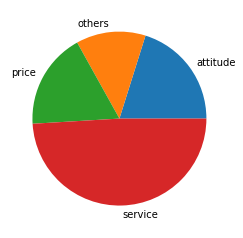

In [326]:
churn_reason_1 = churn_reason.loc[data['label'] == 1]
churn_reason_1_plot = churn_reason_1.groupby(['ChurnReasonCategory']).agg('count').apply(lambda x: x/float(x.sum()))#['Gender','ChurnReasonCategory']
my_labels = ['attitude','others','price','service']
plt.pie(churn_reason_1_plot['Gender'], labels=my_labels)
plt.show() 

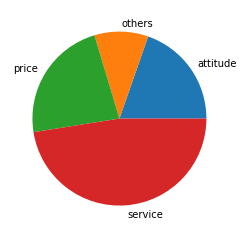

In [329]:
churn_reason_2 = churn_reason.loc[data['label'] == 2]
churn_reason_2_plot = churn_reason_2.groupby(['ChurnReasonCategory']).agg('count').apply(lambda x: x/float(x.sum()))#['Gender','ChurnReasonCategory']
my_labels = ['attitude','others','price','service']
plt.pie(churn_reason_2_plot['Gender'], labels=my_labels)
plt.show() 

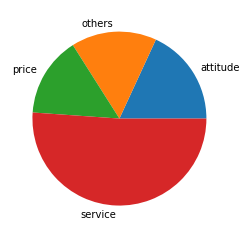

In [330]:
churn_reason_3 = churn_reason.loc[data['label'] == 3]
churn_reason_3_plot = churn_reason_3.groupby(['ChurnReasonCategory']).agg('count').apply(lambda x: x/float(x.sum()))#['Gender','ChurnReasonCategory']
my_labels = ['attitude','others','price','service']
plt.pie(churn_reason_3_plot['Gender'], labels=my_labels)
plt.show() 

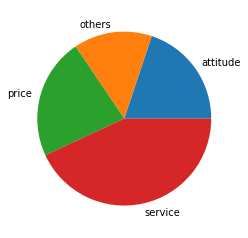

In [331]:
churn_reason_4 = churn_reason.loc[data['label'] == 4]
churn_reason_4_plot = churn_reason_4.groupby(['ChurnReasonCategory']).agg('count').apply(lambda x: x/float(x.sum()))#['Gender','ChurnReasonCategory']
my_labels = ['attitude','others','price','service']
plt.pie(churn_reason_4_plot['Gender'], labels=my_labels)
plt.show() 

In [302]:
# def label_function(val):
#     return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

# churn_reason_1.groupby('ChurnReasonCategory').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},colors=['tomato', 'gold', 'skyblue'], ax=ax1)



### cluster population

In [273]:
data_final.groupby(['label']).sum()

,Gender,SeniorCitizen,Dependents,MonthlyCharges,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,57,5,16,2301.60,480913,4912,23,29,43,26,32,2835.44,0,0,0,0,0,2301.60,49.27,0,23503.51,43107.19,231,0.0,113.0,103.0,0.0,10.0,0.0,0.0,113.0,0.0,113.0,0.0,0.0,113.0,0.0,0.0,113.0,0.0,0.0,113.0,0.0,0.0,113.0,0.0,0.0,113.0,0.0,99.0,9.0,5.0,71.0,42.0,18.0,9.0,15.0,71.0,52.0,0.0,4.0,2.0,10.0,45.0,0.0,0.0,0.0,113.0
1,125,29,10,23141.35,1100573,8757,178,97,26,90,123,6714.04,12301,104,72,191,165,23141.35,156.89,8880,160559.63,781532.64,442,3.0,260.0,97.0,3.0,163.0,25.0,238.0,0.0,211.0,0.0,52.0,161.0,0.0,102.0,159.0,0.0,104.0,191.0,0.0,72.0,117.0,0.0,146.0,111.0,0.0,152.0,210.0,44.0,9.0,61.0,202.0,40.0,33.0,158.0,32.0,137.0,10.0,22.0,22.0,26.0,46.0,23.0,10.0,230.0,0.0
2,148,106,10,26798.05,1292312,15373,17,189,20,176,351,8536.36,5129,154,84,160,257,26798.05,2125.58,710,388731.27,1623516.39,462,1.0,279.0,59.0,1.0,220.0,23.0,257.0,0.0,195.0,0.0,85.0,130.0,0.0,150.0,126.0,0.0,154.0,196.0,0.0,84.0,63.0,0.0,217.0,64.0,0.0,216.0,181.0,69.0,30.0,50.0,230.0,63.0,50.0,151.0,16.0,159.0,24.0,62.0,18.0,8.0,9.0,20.0,18.0,242.0,0.0
3,214,70,46,18620.00,1645052,18941,78,108,94,104,160,5484.94,10493,85,74,105,343,18620.00,334.39,2180,37435.28,244521.99,670,166.0,237.0,195.0,166.0,42.0,393.0,10.0,0.0,323.0,0.0,80.0,316.0,0.0,87.0,318.0,0.0,85.0,329.0,0.0,74.0,318.0,0.0,85.0,315.0,0.0,88.0,374.0,26.0,3.0,146.0,257.0,40.0,53.0,191.0,119.0,221.0,1.0,10.0,9.0,27.0,135.0,128.0,266.0,9.0,0.0
4,386,266,24,68269.85,3236406,44973,8,246,38,228,308,19729.53,13523,202,80,272,737,68269.85,172.85,1610,200762.21,991781.61,1440,0.0,810.0,395.0,0.0,415.0,18.0,792.0,0.0,732.0,0.0,78.0,626.0,0.0,184.0,608.0,0.0,202.0,730.0,0.0,80.0,444.0,0.0,366.0,448.0,0.0,362.0,791.0,18.0,1.0,141.0,669.0,97.0,87.0,556.0,70.0,482.0,0.0,3.0,44.0,90.0,191.0,42.0,13.0,755.0,0.0
6,546,186,423,85553.65,5054325,50046,229,1077,886,1077,7832,23840.69,31585,618,536,543,959,85553.65,2583.53,9640,1128908.02,5390958.09,3933,127.0,950.0,376.0,127.0,574.0,564.0,513.0,0.0,495.0,0.0,582.0,452.0,0.0,625.0,459.0,0.0,618.0,541.0,0.0,536.0,455.0,0.0,622.0,482.0,0.0,595.0,389.0,293.0,395.0,414.0,663.0,320.0,324.0,290.0,143.0,558.0,169.0,189.0,64.0,62.0,35.0,180.0,384.0,513.0,0.0
7,554,35,297,21665.15,4499744,43882,240,329,597,288,530,25548.71,0,0,0,0,0,21665.15,1823.11,0,759657.40,1411469.79,4137,0.0,1033.0,823.0,0.0,210.0,0.0,0.0,1033.0,0.0,1033.0,0.0,0.0,1033.0,0.0,0.0,1033.0,0.0,0.0,1033.0,0.0,0.0,1033.0,0.0,0.0,1033.0,0.0,366.0,264.0,403.0,752.0,281.0,213.0,236.0,77.0,507.0,580.0,55.0,103.0,55.0,128.0,112.0,0.0,0.0,0.0,1033.0
8,543,217,273,101316.45,5427822,51229,220,590,535,539,1075,30515.55,29820,763,653,722,918,101316.45,2630.92,13660,1702194.30,7495188.63,3979,6.0,1081.0,281.0,6.0,800.0,338.0,749.0,0.0,487.0,0.0,600.0,354.0,0.0,733.0,324.0,0.0,763.0,434.0,0.0,653.0,298.0,0.0,789.0,270.0,0.0,817.0,260.0,356.0,471.0,336.0,751.0,347.0,349.0,306.0,85.0,558.0,194.0,278.0,50.0,7.0,0.0,107.0,231.0,749.0,0.0
9,168,12,250,8200.10,1694650,

In [277]:
data['label'] = data_final['label']

In [280]:
data.columns

Index(['CustomerID', 'City', 'ZipCode', 'Gender', 'SeniorCitizen',
       'Dependents', 'TenureMonths', 'MonthlyCharges', 'TotalCharges',
       'ChurnValue', 'ChurnScore', 'CLTV', 'ChurnReason', 'Age', 'Under30',
       'Married', 'NumberofDependents', 'ReferredaFriend', 'NumberofReferrals',
       'TenureinMonths', 'AvgMonthlyLongDistanceCharges',
       'AvgMonthlyGBDownload', 'DeviceProtectionPlan', 'PremiumTechSupport',
       'StreamingMusic', 'UnlimitedData', 'MonthlyCharge', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'ChurnReasonCategory', 'PhoneService_1',
       'PhoneService_2', 'MultipleLines_1', 'MultipleLines_2',
       'MultipleLines_3', 'InternetService_1', 'InternetService_2',
       'InternetService_3', 'OnlineSecurity_1', 'OnlineSecurity_2',
       'OnlineSecurity_3', 'OnlineBackup_1', 'OnlineBackup_2',
       'OnlineBackup_3', 'DeviceProtection_1', 'DeviceProtection_2',
       'DeviceProtec

In [278]:
data.groupby(['label']).sum()

,City,ZipCode,Gender,SeniorCitizen,Dependents,TenureMonths,MonthlyCharges,ChurnValue,ChurnScore,CLTV,Age,Under30,Married,NumberofDependents,ReferredaFriend,NumberofReferrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,DeviceProtectionPlan,PremiumTechSupport,StreamingMusic,UnlimitedData,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,64506,10565293,57,5,16,931,2301.60,113,9364,480913,4912,23,29,43,26,32,931,2835.44,0,0,0,0,0,2301.60,49.27,0,23503.51,43107.19,231,0.0,113.0,103.0,0.0,10.0,0.0,0.0,113.0,0.0,113.0,0.0,0.0,113.0,0.0,0.0,113.0,0.0,0.0,113.0,0.0,0.0,113.0,0.0,0.0,113.0,0.0,99.0,9.0,5.0,71.0,42.0,18.0,9.0,15.0,71.0,52.0,0.0,4.0,2.0,10.0,45.0,0.0,0.0,0.0,113.0
1,161500,24605192,125,29,10,6598,23141.35,263,21663,1100573,8757,178,97,26,90,123,6598,6714.04,12301,104,72,191,165,23141.35,156.89,8880,160559.63,781532.64,442,3.0,260.0,97.0,3.0,163.0,25.0,238.0,0.0,211.0,0.0,52.0,161.0,0.0,102.0,159.0,0.0,104.0,191.0,0.0,72.0,117.0,0.0,146.0,111.0,0.0,152.0,210.0,44.0,9.0,61.0,202.0,40.0,33.0,158.0,32.0,137.0,10.0,22.0,22.0,26.0,46.0,23.0,10.0,230.0,0.0
2,173882,26221840,148,106,10,12697,26798.05,280,23412,1292312,15373,17,189,20,176,351,12697,8536.36,5129,154,84,160,257,26798.05,2125.58,710,388731.27,1623516.39,462,1.0,279.0,59.0,1.0,220.0,23.0,257.0,0.0,195.0,0.0,85.0,130.0,0.0,150.0,126.0,0.0,154.0,196.0,0.0,84.0,63.0,0.0,217.0,64.0,0.0,216.0,181.0,69.0,30.0,50.0,230.0,63.0,50.0,151.0,16.0,159.0,24.0,62.0,18.0,8.0,9.0,20.0,18.0,242.0,0.0
3,242229,37638699,214,70,46,4278,18620.00,403,33117,1645052,18941,78,108,94,104,160,4278,5484.94,10493,85,74,105,343,18620.00,334.39,2180,37435.28,244521.99,670,166.0,237.0,195.0,166.0,42.0,393.0,10.0,0.0,323.0,0.0,80.0,316.0,0.0,87.0,318.0,0.0,85.0,329.0,0.0,74.0,318.0,0.0,85.0,315.0,0.0,88.0,374.0,26.0,3.0,146.0,257.0,40.0,53.0,191.0,119.0,221.0,1.0,10.0,9.0,27.0,135.0,128.0,266.0,9.0,0.0
4,475526,75780943,386,266,24,9099,68269.85,810,66656,3236406,44973,8,246,38,228,308,9099,19729.53,13523,202,80,272,737,68269.85,172.85,1610,200762.21,991781.61,1440,0.0,810.0,395.0,0.0,415.0,18.0,792.0,0.0,732.0,0.0,78.0,626.0,0.0,184.0,608.0,0.0,202.0,730.0,0.0,80.0,444.0,0.0,366.0,448.0,0.0,362.0,791.0,18.0,1.0,141.0,669.0,97.0,87.0,556.0,70.0,482.0,0.0,3.0,44.0,90.0,191.0,42.0,13.0,755.0,0.0
6,637543,100708988,546,186,423,51449,85553.65,0,53513,5054325,50046,229,1077,886,1077,7832,51469,23840.69,31585,618,536,543,959,85553.65,2583.53,9640,1128908.02,5390958.09,3933,127.0,950.0,376.0,127.0,574.0,564.0,513.0,0.0,495.0,0.0,582.0,452.0,0.0,625.0,459.0,0.0,618.0,541.0,0.0,536.0,455.0,0.0,622.0,482.0,0.0,595.0,389.0,293.0,395.0,414.0,663.0,320.0,324.0,290.0,143.0,558.0,169.0,189.0,64.0,62.0,35.0,180.0,384.0,513.0,0.0
7,617740,96663908,554,35,297,30231,21665.15,0,52331,4499744,43882,240,329,597,288,530,30251,25548.71,0,0,0,0,0,21665.15,1823.11,0,759657.40,1411469.79,4137,0.0,1033.0,823.0,0.0,210.0,0.0,0.0,1033.0,0.0,1033.0,0.0,0.0,1033.0,0.0,0.0,1033.0,0.0,0.0,1033.0,0.0,0.0,1033.0,0.0,0.0,1033.0,0.0,366.0,264.0,403.0,752.0,281.0,213.0,236.0,77.0,507.0,580.0,55.0,103.0,55.0,128.0,112.0,0.0,0.0,0.0,1033.0
8,650984,101637062,543,217,273,61976,101316.45,0,54922,5427822,51229,220,590,535,539,1075,61976

In [281]:
data.groupby('label').agg({'CustomerID':'nunique'})

,CustomerID
label,
0,113
1,263
2,280
3,403
4,810
6,1077
7,1033
8,1087
9,380
